In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix

import seaborn as sns
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import layers, regularizers

In [7]:
train_dir = "/content/drive/MyDrive/dataset_dl_lab4/train"
validation_dir = "/content/drive/MyDrive/dataset_dl_lab4/test"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [8]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


**4) Import the VGG-16 model**

In [9]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

**5) Add new layers and compile the model for the new dataset** 



In [13]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


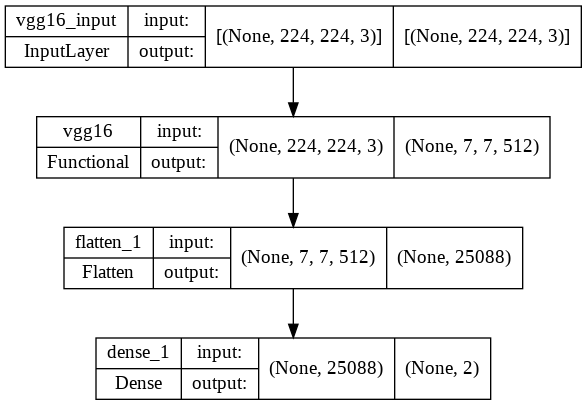

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

**6) Train the model**

In [17]:
history = model.fit(
train_generator,
      # steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      # validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
121/121 [==============================] - 55s 451ms/step - loss: 0.1481 - acc: 0.9567
Epoch 2/10
121/121 [==============================] - 14s 115ms/step - loss: 0.1119 - acc: 0.9688
Epoch 3/10
121/121 [==============================] - 14s 117ms/step - loss: 0.0920 - acc: 0.9754
Epoch 4/10
121/121 [==============================] - 14s 118ms/step - loss: 0.0786 - acc: 0.9825
Epoch 5/10
121/121 [==============================] - 14s 118ms/step - loss: 0.0667 - acc: 0.9871
Epoch 6/10
121/121 [==============================] - 15s 121ms/step - loss: 0.0611 - acc: 0.9871
Epoch 7/10
121/121 [==============================] - 15s 120ms/step - loss: 0.0516 - acc: 0.9913
Epoch 8/10
121/121 [==============================] - 15s 121ms/step - loss: 0.0466 - acc: 0.9929
Epoch 9/10
121/121 [==============================] - 15s 121ms/step - loss: 0.0423 - acc: 0.9925
Epoch 10/10
121/121 [==============================] - 15s 121ms/step - loss: 0.0372 - acc: 0.9950


ALEXNET IMPLEMENTATION

In [18]:

model_alexnet = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
    
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(2, activation='softmax')
])

In [19]:
model_alexnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

In [20]:
model_alexnet.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

In [21]:
history = model_alexnet.fit(
train_generator,
      # steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      # validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
121/121 [==============================] - 20s 140ms/step - loss: 1.0978 - acc: 0.7880 - val_loss: 1.0732 - val_acc: 0.4615
Epoch 2/10
121/121 [==============================] - 15s 125ms/step - loss: 0.3958 - acc: 0.8480 - val_loss: 0.6418 - val_acc: 0.5577
Epoch 3/10
121/121 [==============================] - 15s 125ms/step - loss: 0.3805 - acc: 0.8680 - val_loss: 1.1833 - val_acc: 0.4769
Epoch 4/10
121/121 [==============================] - 15s 125ms/step - loss: 0.5329 - acc: 0.8355 - val_loss: 0.5510 - val_acc: 0.7577
Epoch 5/10
121/121 [==============================] - 16s 128ms/step - loss: 0.3455 - acc: 0.8751 - val_loss: 0.4346 - val_acc: 0.7577
Epoch 6/10
121/121 [==============================] - 15s 125ms/step - loss: 0.2182 - acc: 0.9217 - val_loss: 0.3082 - val_acc: 0.8923
Epoch 7/10
121/121 [==============================] - 15s 125ms/step - loss: 0.1777 - acc: 0.9284 - val_loss: 0.2387 - val_acc: 0.9269
Epoch 8/10
121/121 [==============================] - 1

In [22]:
model_alexnet.evaluate(validation_generator) # In the above epochs we can clearly see that the model is overfitting.

13/13 [==============================] - 1s 83ms/step - loss: 0.8169 - acc: 0.7962


[0.8168653845787048, 0.7961538434028625]

GOOGLENET PRETRAINED

In [23]:
from keras.applications.inception_v3 import InceptionV3

In [24]:
model_inceptionv3 = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
model_inceptionv3.trainable = False #freeze the layers
model_inceptionv3.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 111, 111, 32  96         ['conv2d_5[0][0]']               
 rmalization)         

In [25]:
model_1 = tf.keras.Sequential([
    model_inceptionv3,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])
model_1.summary()

model_1.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_5 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [26]:
history = model_1.fit(
train_generator,
      # steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      # validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
121/121 [==============================] - 19s 119ms/step - loss: 0.0737 - acc: 0.9742 - val_loss: 0.0755 - val_acc: 0.9846
Epoch 2/10
121/121 [==============================] - 12s 101ms/step - loss: 0.0104 - acc: 0.9963 - val_loss: 0.0715 - val_acc: 0.9846
Epoch 3/10
121/121 [==============================] - 12s 102ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0619 - val_acc: 0.9885
Epoch 4/10
121/121 [==============================] - 12s 101ms/step - loss: 9.4011e-04 - acc: 1.0000 - val_loss: 0.0689 - val_acc: 0.9846
Epoch 5/10
121/121 [==============================] - 12s 101ms/step - loss: 6.3436e-04 - acc: 1.0000 - val_loss: 0.0789 - val_acc: 0.9846
Epoch 6/10
121/121 [==============================] - 12s 101ms/step - loss: 5.0451e-04 - acc: 1.0000 - val_loss: 0.0746 - val_acc: 0.9846
Epoch 7/10
121/121 [==============================] - 12s 101ms/step - loss: 4.0879e-04 - acc: 1.0000 - val_loss: 0.0762 - val_acc: 0.9846
Epoch 8/10
121/121 [===================

In [27]:
model_1.evaluate(validation_generator) # By using Inception V3 pretrained weights usig transfer learning our model is performing really well with a very high accuracy.

13/13 [==============================] - 1s 91ms/step - loss: 0.0845 - acc: 0.9846


[0.0844929963350296, 0.9846153855323792]

Resnet 50

In [28]:
from keras.applications.resnet import ResNet50

In [29]:
model_resnet = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
model_resnet.trainable = False #freeze the layers
model_resnet.summary()

94781440/94765736 [==============================] - 7s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [30]:
model_2 = tf.keras.Sequential([
    model_resnet,
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model_2.summary()

model_2.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [31]:
history = model_2.fit(
train_generator,
      # steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      # validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
121/121 [==============================] - 17s 113ms/step - loss: 0.4814 - acc: 0.7584 - val_loss: 0.3923 - val_acc: 0.8269
Epoch 2/10
121/121 [==============================] - 13s 104ms/step - loss: 0.4263 - acc: 0.7963 - val_loss: 0.3684 - val_acc: 0.8385
Epoch 3/10
121/121 [==============================] - 13s 103ms/step - loss: 0.3805 - acc: 0.8272 - val_loss: 0.3868 - val_acc: 0.8385
Epoch 4/10
121/121 [==============================] - 13s 104ms/step - loss: 0.3358 - acc: 0.8563 - val_loss: 0.3193 - val_acc: 0.8577
Epoch 5/10
121/121 [==============================] - 13s 104ms/step - loss: 0.3201 - acc: 0.8676 - val_loss: 0.3126 - val_acc: 0.8577
Epoch 6/10
121/121 [==============================] - 13s 103ms/step - loss: 0.3043 - acc: 0.8771 - val_loss: 0.3176 - val_acc: 0.8692
Epoch 7/10
121/121 [==============================] - 13s 104ms/step - loss: 0.2935 - acc: 0.8792 - val_loss: 0.3330 - val_acc: 0.8577
Epoch 8/10
121/121 [==============================] - 1

In [32]:
model_2.evaluate(validation_generator)

13/13 [==============================] - 1s 93ms/step - loss: 0.2886 - acc: 0.8654


[0.28856030106544495, 0.8653846383094788]

EfficientNetB0

In [33]:
from keras.applications.efficientnet import EfficientNetB0

In [34]:
model_efficientnet = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
model_efficientnet.trainable = False #freeze the layers
model_efficientnet.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [35]:
model_3 = tf.keras.Sequential([
    model_efficientnet,
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model_3.summary()

model_3.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_7 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [36]:
history = model_3.fit(
train_generator,
      # steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      # validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/20
121/121 [==============================] - 20s 111ms/step - loss: 0.7506 - acc: 0.5227 - val_loss: 0.7386 - val_acc: 0.4615
Epoch 2/20
121/121 [==============================] - 12s 98ms/step - loss: 0.7560 - acc: 0.5273 - val_loss: 0.7065 - val_acc: 0.4615
Epoch 3/20
121/121 [==============================] - 12s 98ms/step - loss: 0.6996 - acc: 0.5514 - val_loss: 0.6696 - val_acc: 0.5308
Epoch 4/20
121/121 [==============================] - 12s 100ms/step - loss: 0.7068 - acc: 0.5464 - val_loss: 0.8002 - val_acc: 0.4615
Epoch 5/20
121/121 [==============================] - 12s 99ms/step - loss: 0.7827 - acc: 0.5227 - val_loss: 0.6803 - val_acc: 0.5385
Epoch 6/20
121/121 [==============================] - 12s 98ms/step - loss: 0.7035 - acc: 0.5648 - val_loss: 0.6984 - val_acc: 0.5385
Epoch 7/20
121/121 [==============================] - 12s 98ms/step - loss: 0.7184 - acc: 0.5419 - val_loss: 0.6661 - val_acc: 0.5385
Epoch 8/20
121/121 [==============================] - 12s 98

In [37]:
model_3.evaluate(validation_generator)

13/13 [==============================] - 1s 88ms/step - loss: 0.6467 - acc: 0.5962


[0.6467440724372864, 0.5961538553237915]

MobileNet V2

In [38]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [39]:
model_mobilenet = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
model_mobilenet.trainable = False #freeze the layers
model_mobilenet.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [40]:
model_4 = tf.keras.Sequential([
    model_mobilenet,
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model_4.summary()

model_4.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_6 (Flatten)         (None, 62720)             0         
                                                                 
 dense_8 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [41]:
history = model_4.fit(
train_generator,
      # steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      # validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/20
121/121 [==============================] - 15s 101ms/step - loss: 0.0687 - acc: 0.9775 - val_loss: 0.0733 - val_acc: 0.9808
Epoch 2/20
121/121 [==============================] - 11s 95ms/step - loss: 0.0058 - acc: 0.9988 - val_loss: 0.0809 - val_acc: 0.9846
Epoch 3/20
121/121 [==============================] - 12s 95ms/step - loss: 5.0848e-04 - acc: 1.0000 - val_loss: 0.0993 - val_acc: 0.9885
Epoch 4/20
121/121 [==============================] - 12s 95ms/step - loss: 2.8665e-04 - acc: 1.0000 - val_loss: 0.0969 - val_acc: 0.9885
Epoch 5/20
121/121 [==============================] - 11s 94ms/step - loss: 1.8552e-04 - acc: 1.0000 - val_loss: 0.0973 - val_acc: 0.9885
Epoch 6/20
121/121 [==============================] - 11s 94ms/step - loss: 1.4991e-04 - acc: 1.0000 - val_loss: 0.1000 - val_acc: 0.9885
Epoch 7/20
121/121 [==============================] - 11s 94ms/step - loss: 1.2829e-04 - acc: 1.0000 - val_loss: 0.0986 - val_acc: 0.9885
Epoch 8/20
121/121 [=====================

In [42]:
model_4.evaluate(validation_generator)

13/13 [==============================] - 1s 87ms/step - loss: 0.1036 - acc: 0.9885


[0.10361779481172562, 0.9884615540504456]